## importing libraries
* numpy  ->(datastructure, vectorization, indexing(slices, steps), broadcasting(multiplication), indexing, reducing)

* pandas ->(data manipulation and analysis)

* tensorflow.keras    -> (interface for artificial neural networks)

* matplotlib creating -> (static, animated, and interactive visualizations)


In [2]:
#import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Reading Dataset
* X1 to X11

* y1 and y3

### Encoding independent output

* allow will be 1 and have the largest weight

* rest_both will be neglected

* deny and drop will be the same weight as 0 standing for suspicious behavior


In [3]:
#dataset
dataset = pd.read_csv('log2.csv')
dataset.value_counts('Action')
dataset["Action"] = dataset["Action"].map({"allow": 1, "deny": 2, "drop":3})
dataset =dataset.dropna()
dataset =dataset.drop_duplicates()
dataset.values.flatten()
#dataset['Action'] = np.where(dataset['Action'] == 'allow', 1, 0) #encoding independent output
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.value_counts('Action')

Action
1.0    37439
3.0    11635
2.0     8042
dtype: int64

# Spliting Data-up 
* test_sitze = 0.2 means that we split data with 80% training and 20% testing
* random_state = 0 means we split data with random picking not sequential

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Performing Feature Scalling
* As you can see in the dataset, all values are not in the same range,  and that requires a lot of time for calculation. So to    overcome this problem, we perform feature scaling.


* Feature scaling help us to normalize the data within a particular range.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.fit_transform(X_test)

## function for plot accurcy history over training 
* for each epoch we store the value
* x-axis Epoch
* y-axis Value the model got

In [7]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    
    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a Deep Neural Net Model

* input 11 unites, for 11 features we have in Dataset
* hidden 150 unites estimated for better performance
* output 3 unites we have [100], [010], [001] three labes index of 1 will define the target

In [25]:
def create_model(my_learning_rate):
    '''
    keras.layers.Dense(units=11, kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(units=150, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    '''
    model = tf.keras.models.Sequential([
        keras.layers.Dense(units=11, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(units=150, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(4, activation="softmax")
        ])
  
  # Define the input layer and first hidden layer.
    #model.add(Dense(units=11, kernel_initializer='normal', activation='relu'))
    
    #model.add(Dense(units=150, activation='relu'))
# Define the input layer and first hidden layer.
    #model.add(Dense(units=100, activation='relu'))
  # Define a dropout regularization layer.
    #keras.layers.Dense(units=150, activation='relu'),

    #model.add(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.Dropout(rate=0.2))
        #tf.keras.layers.BatchNormalization()
        #tf.keras.layers.Dropout(rate=0.2)
  # Define the output layer. 
    #model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
        #keras.layers.Dense(10, activation="softmax")
        #])
                           
  # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [26]:
def train_model(model, train_features, train_label, epochs,
                batch_size, validation_split):
    
    history = model.fit(train_features, train_label, batch_size,
                      epochs=epochs, 
                      validation_split=validation_split,
                      verbose=1)
        
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist 

# calling the prev function and define hyperparameters

In [27]:
from tensorflow import keras

Epoch 1/5
3656/3656 [==============================] - 14s 4ms/step - loss: 0.0965 - accuracy: 0.9742 - val_loss: 0.0366 - val_accuracy: 0.9952
Epoch 2/5
3656/3656 [==============================] - 13s 4ms/step - loss: 0.0514 - accuracy: 0.9889 - val_loss: 0.0298 - val_accuracy: 0.9943
Epoch 3/5
3656/3656 [==============================] - 13s 4ms/step - loss: 0.0484 - accuracy: 0.9900 - val_loss: 0.0303 - val_accuracy: 0.9939
Epoch 4/5
3656/3656 [==============================] - 13s 4ms/step - loss: 0.0434 - accuracy: 0.9912 - val_loss: 0.0277 - val_accuracy: 0.9952
Epoch 5/5
3656/3656 [==============================] - 17s 5ms/step - loss: 0.0456 - accuracy: 0.9905 - val_loss: 0.0245 - val_accuracy: 0.9951

 Evaluate the new model against the test set:
1143/1143 [==============================] - 3s 3ms/step - loss: 0.0375 - accuracy: 0.9941


[0.03753313794732094, 0.9941351413726807]

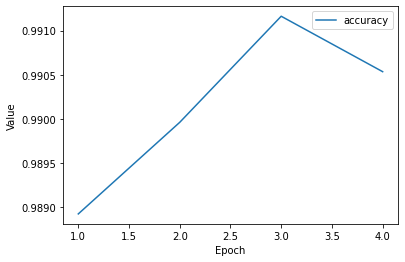

In [28]:
#hyperparameters
learning_rate = 0.003 #
epochs = 5
batch_size = 10 #
validation_split = 0.2 #

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train_normalized, y_train, 
                           epochs, batch_size, validation_split)
# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=X_test_normalized, y=y_test, batch_size=batch_size)

In [29]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 150)               1800      
                                                                 
 batch_normalization_3 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 604       
                                                                 
Total params: 3,136
Trainable params: 2,836
Non-trainable params: 300
__________________________________________________

In [ ]:
#testing and virtualize

In [54]:
my_model.predict([[57360,  18375,     0,     0,    60,    66,     0,     1,     0,     1,     0]])
#[[6666,21,0,0,60,60,0,1,0,1,0]]
#[[51120,445,0,0,70,70,0,1,0,1,0]]
#[56174,445,0,0,70,70,0,1,0,1,0]
#[[57222,53,54587,53,177,94,83,2,30,1,1]]
#[15056,  2222,     0,     0,    60,    60,     0,     1,     0,     1,     0]
#[57360,  18375,     0,     0,    60,    66,     0,     1,     0,     1,     0]
#		0	0			0	1	0	1	0

1/1 [==============================] - 0s 83ms/step


array([[0., 0., 1., 0.]], dtype=float32)

In [51]:
X_test[6020]

array([15056,  2222,     0,     0,    60,    60,     0,     1,     0,     1,     0], dtype=int64)